# NN Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
def NN_pred(yhat):
    if yhat >= 0.5:
        return 1
    else:
        return 0

In [5]:
def eval_err(y, yhat):
    m = y.shape[0]
    incorrect = 0
    y = y.tolist()
    for i in range(m):
        if yhat[i] != y[i]:
            incorrect += 1
            
    incorrect = incorrect / m
    
    return incorrect 

In [6]:
def pred_output(prediction):
    ex = prediction.shape[0]
    output = []
    for i in range(ex):
        output.append(NN_pred(prediction[i]))
    
    return output

In [40]:
def sigmoid(z):

    calc = math.e**-z
    g = 1 / (1 + calc)

    return g

In [7]:
train_set = pd.read_csv('TrainSet1.csv')
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,AgeFare,SibPar
0,0,3,1,22.0,1,0,7.2500,0,1,159.5000,1
1,1,1,0,38.0,1,0,71.2833,0,0,2708.7654,1
2,1,3,0,26.0,0,0,7.9250,0,1,206.0500,0
3,1,1,0,35.0,1,0,53.1000,0,1,1858.5000,1
4,0,3,1,35.0,0,0,8.0500,0,1,281.7500,0


### Creating x_train, y_train set

In [8]:
y = train_set['Survived']
x = train_set.drop(['Survived'], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [13]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.fit_transform(X_test, y_test)

### Creating a TF-Keras model

In [19]:
#Using the sigmoid activation function to get the best weights and biases for the created model (below)
model_NN = Sequential(
    [
        tf.keras.Input(shape=(10,)),
        Dense(units=32, activation='sigmoid'),
        Dense(units=16, activation='sigmoid'),
        Dense(units=1, activation='sigmoid'),
    ], name="model_NN")

model_NN.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=BinaryCrossentropy())

#### Using an early_stop

In [20]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

### Fitting 

In [21]:
#Fitting the model
model_NN.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.7567 - val_loss: 0.6930
Epoch 2/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6689 - val_loss: 0.6536
Epoch 3/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6413 - val_loss: 0.6422
Epoch 4/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6308 - val_loss: 0.6337
Epoch 5/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6217 - val_loss: 0.6230
Epoch 6/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6119 - val_loss: 0.6110
Epoch 7/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6020 - val_loss: 0.5999
Epoch 8/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5904 - val_loss: 0.5862
Epoch 9/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5786 - val_loss: 0.5723
Epoch 10/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5670 - val_loss: 0.5584

23/23 [==============================] - 0s 1ms/step - loss: 0.4345 - val_loss: 0.4079
Epoch 83/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4341 - val_loss: 0.4103
Epoch 84/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4088
Epoch 85/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4092
Epoch 86/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4087
Epoch 87/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4101
Epoch 88/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4336 - val_loss: 0.4084
Epoch 89/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4333 - val_loss: 0.4078
Epoch 90/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4331 - val_loss: 0.4062
Epoch 91/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4332 - val_loss: 0.4077
Epoc

23/23 [==============================] - 0s 1ms/step - loss: 0.4265 - val_loss: 0.3966
Epoch 163/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4261 - val_loss: 0.3972
Epoch 164/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4261 - val_loss: 0.3976
Epoch 165/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4268 - val_loss: 0.3966
Epoch 166/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4262 - val_loss: 0.3988
Epoch 167/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4273 - val_loss: 0.3967
Epoch 168/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4260 - val_loss: 0.3989
Epoch 169/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4261 - val_loss: 0.3968
Epoch 170/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4259 - val_loss: 0.3978
Epoch 171/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4257 - val_loss: 0.

23/23 [==============================] - 0s 1ms/step - loss: 0.4195 - val_loss: 0.3873
Epoch 243/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4191 - val_loss: 0.3879
Epoch 244/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4192 - val_loss: 0.3857
Epoch 245/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4186 - val_loss: 0.3876
Epoch 246/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4189 - val_loss: 0.3883
Epoch 247/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4195 - val_loss: 0.3879
Epoch 248/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4190 - val_loss: 0.3850
Epoch 249/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4185 - val_loss: 0.3859
Epoch 250/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4184 - val_loss: 0.3861
Epoch 251/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4190 - val_loss: 0.

23/23 [==============================] - 0s 1ms/step - loss: 0.4102 - val_loss: 0.3762
Epoch 323/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4100 - val_loss: 0.3775
Epoch 324/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4097 - val_loss: 0.3760
Epoch 325/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4096 - val_loss: 0.3776
Epoch 326/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4096 - val_loss: 0.3760
Epoch 327/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4094 - val_loss: 0.3771
Epoch 328/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4091 - val_loss: 0.3760
Epoch 329/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4090 - val_loss: 0.3766
Epoch 330/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4088 - val_loss: 0.3768
Epoch 331/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4086 - val_loss: 0.

23/23 [==============================] - 0s 1ms/step - loss: 0.3997 - val_loss: 0.3698
Epoch 403/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3992 - val_loss: 0.3703
Epoch 404/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3990 - val_loss: 0.3701
Epoch 405/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3993 - val_loss: 0.3693
Epoch 406/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3992 - val_loss: 0.3715
Epoch 407/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3991 - val_loss: 0.3689
Epoch 408/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3980 - val_loss: 0.3700
Epoch 409/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3987 - val_loss: 0.3708
Epoch 410/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3983 - val_loss: 0.3683
Epoch 411/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3982 - val_loss: 0.

### Plotting the loss metrics vs epoch history

<AxesSubplot:>

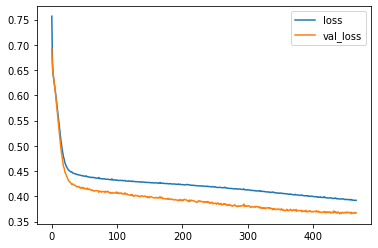

In [22]:
loss_mol = pd.DataFrame(model_NN.history.history)
loss_mol.plot()

In [24]:
#Checking the 1st train_set prediction (y = 0)
print(model_NN.predict(X_train[0].reshape(1,10)))

1/1 [==============================] - 0s 45ms/step
[[0.9904069]]


### Obtaining the model results

In [25]:
print(model_NN.evaluate(X_test, y_test))
print(model_NN.evaluate(X_train, y_train))

6/6 [==============================] - 0s 601us/step - loss: 0.3673
0.3673446774482727
23/23 [==============================] - 0s 546us/step - loss: 0.3911
0.391137957572937


In [26]:
#Obtaining the prediction for each set. Using function (pred_output) to unpack the result
output_train = pred_output(model_NN.predict(X_train))
output_test = pred_output(model_NN.predict(X_test))

6/6 [==============================] - 0s 600us/step


## Model Results

In [27]:
#Printing the model accuracy
print('Train Accuracy: %f'%(np.mean(output_train == y_train) * 100))
print('Test Accuracy: %f'%(np.mean(output_test == y_test) * 100))

Train Accuracy: 84.247539
Test Accuracy: 83.146067


In [29]:
#Checking the model error (% of incorrect guesses) using function (eval_err)
error_test = eval_err(y_test, output_test)
error_train = eval_err(y_train, output_train)
print(f"error test:  {error_test :0.3f}")
print(f"error train: {error_train :0.3f}")

error test:  0.169
error train: 0.158


In [30]:
print(classification_report(y_test, output_test))
print(confusion_matrix(y_test, output_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       107
           1       0.87      0.68      0.76        71

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.83      0.83       178

[[100   7]
 [ 23  48]]


### Saving model

In [31]:
model_NN.summary()
model_NN.save('Model_tf_NN.h5')

Model: "model_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


## Building a Deep NN
##### Models must be identical
Since the built model is a forward propagation one, the weights must be calculated beforehand

In [231]:
#Create code that runs per layer:
    #Every node uses its weights and np.dots(x, w) + b // Uses the result in the sigmoid function
    #Each layer output is equal to the node prediction
    #Layer input takes the last layer's output

### Getting the tf imported models layers weights

In [32]:
[l1, l2, l3] = model_NN.layers

In [33]:
#Unpacking weights and biases
W1_tmp, b1_tmp = l1.get_weights()
W2_tmp, b2_tmp = l2.get_weights()
W3_tmp, b3_tmp = l3.get_weights()

In [34]:
#Just a shape visualization (every output == next input)
print(W1_tmp.shape)
print(W2_tmp.shape)
print(W3_tmp.shape)
print(X_train.shape)
print(X_test.shape)

(10, 32)
(32, 16)
(16, 1)
(711, 10)
(178, 10)


### Layer function
#### Takes the weights, biases, activation function (sigmoid) and calculates the prediction for each node
Considering the input (initially the training data), the layer uses np.dot to multiple the respective input values for the weights, inserts in the activation function and returns the prediction for each node

In [41]:
def layers(a_in, W, b, g):
    #Use the input a_in
    units = W.shape[1]
    a_out = np.zeros(units)
    
    for i in range(units):
        #Activation function input
        res = np.dot(W[:,i], a_in) + b[i]
        a_out[i] = g(res)
        
    return a_out

### Sequential 
#### Creates the "network"
Uses the layers function to get each layer output and propagate it to the next layer

In [42]:
def sequential(x, W1, b1, W2, b2, W3, b3, g):
    #Initial input value is the training/test set
    a1 = layers(x, W1, b1, g)
    a2 = layers(a1, W2, b2, g)
    a3 = layers(a2, W3, b3, g)
    
    return a3

### Runing the NN built model
#####  Iterates over input items returning the prediction and setting the prediction to a 1/0 

In [43]:
def run_nn_built(X, threshold):
    ## Get No examples to run prediction
    examples = X.shape[0]
    prediction_nn_built = np.zeros(examples)
    
    for i in range(examples):
        ## Iterate over all examples and add it to prediction
        prob = sequential(X[i], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp, g=sigmoid)
        
        #Takes the prediction as a 1/0 output
        if prob >= threshold:
            prob = 1
        else:
            prob = 0
            
        prediction_nn_built[i] = prob
        
    return prediction_nn_built

In [44]:
#Runs model in bot sets
pred_nn_built_train = run_nn_built(X_train, 0.5)
pred_nn_built_test = run_nn_built(X_test, 0.5)

## NN Built Model Results

In [46]:
#Error % in each set
error_test = eval_err(y_test, pred_nn_built_test)
error_train = eval_err(y_train, pred_nn_built_train)
print(f"error test:  {error_test :0.3f}")
print(f"error train: {error_train :0.3f}")

error test:  0.169
error train: 0.158


In [47]:
#Model accuracy per set
print('Train Accuracy: %f'%(np.mean(pred_nn_built_train == y_train) * 100))
print('Test Accuracy: %f'%(np.mean(pred_nn_built_test == y_test) * 100))

Train Accuracy: 84.247539
Test Accuracy: 83.146067


In [48]:
print(classification_report(y_test, pred_nn_built_test))
print(confusion_matrix(y_test, pred_nn_built_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       107
           1       0.87      0.68      0.76        71

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.83      0.83       178

[[100   7]
 [ 23  48]]


## Improving the calculation time using matmul instead of np.dot()

In [49]:
def layers_matmul(a_in, W, b, g):
    #Use the input a_in
    #Instead of a np.dot the z (activation function input) uses matmul to reduce the calculation demands
    res = np.matmul(a_in, W) + b
    a_out[i] = g(res)
        
    return a_out

In [50]:
def sequential_matmul(x, W1, b1, W2, b2, W3, b3, g):
    #Same logic as the above, changes the function call only
    a1 = layers_matmul(x, W1, b1, g)
    a2 = layers_matmul(a1, W2, b2, g)
    a3 = layers_matmul(a2, W3, b3, g)
    
    return a3

In [51]:
def run_nn_built_matmul(X, threshold):
    ## Get No examples to run prediction
    examples = X.shape[0]
    prediction_nn_built = np.zeros(examples)
    
    for i in range(examples):
        ## Iterate over all examples and add it to prediction
        prob = sequential_matmul(X[i], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp, g=sigmoid)
        
        if prob >= threshold:
            prob = 1
        else:
            prob = 0
            
        prediction_nn_built[i] = prob
        
    return prediction_nn_built

In [53]:
pred_nn_built_train_matmul = run_nn_built(X_train, 0.5)
pred_nn_built_test_matmul = run_nn_built(X_test, 0.5)

## NN Built Matmul Results

In [54]:
error_test = eval_err(y_test, pred_nn_built_test_matmul)
error_train = eval_err(y_train, pred_nn_built_train_matmul)
print(f"error test:  {error_test :0.3f}")
print(f"error train: {error_train :0.3f}")

error test:  0.169
error train: 0.158


In [56]:
print('Test Accuracy: %f'%(np.mean(pred_nn_built_test_matmul == y_test) * 100))
print('Train Accuracy: %f'%(np.mean(pred_nn_built_train_matmul == y_train) * 100))

Test Accuracy: 83.146067
Train Accuracy: 84.247539


In [60]:
print(classification_report(y_test, pred_nn_built_test_matmul))
print(confusion_matrix(y_test, pred_nn_built_test_matmul))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       107
           1       0.87      0.68      0.76        71

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.83      0.83       178

[[100   7]
 [ 23  48]]
